<a href="https://colab.research.google.com/github/DrewRust/DS-Unit-2-Linear-Models/blob/master/U2S1M1_assignment_Andrew_Rust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [101]:
# Look at the data. Choose a feature, and plot its relationship with the target.
df.head(3)

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
0        1.5         3  ...                 0                    0
1        1.0         2  ...                 0                    0
2        1.0         1  ...                 0                    0

[3 rows x 34 columns]

###Describe columns both numeric and non-numeric:

In [102]:
df['price'].describe()

count    48818.000000
mean      3579.560982
std       1762.420875
min       1375.000000
25%       2500.000000
50%       3150.000000
75%       4095.000000
max      15500.000000
Name: price, dtype: float64

In [103]:
df['display_address'].describe()

count        48685
unique        8675
top       Broadway
freq           435
Name: display_address, dtype: object

In [104]:
df['bedrooms'].describe()

count    48818.000000
mean         1.537158
std          1.106078
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: bedrooms, dtype: float64

In [105]:
df['bathrooms'].describe()

count    48818.000000
mean         1.201790
std          0.470707
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: bathrooms, dtype: float64

In [106]:
df['interest_level'].describe()

count     48818
unique        3
top         low
freq      33947
Name: interest_level, dtype: object

###Value counts of binary columns:

In [107]:
df['doorman'].value_counts()

0    28078
1    20740
Name: doorman, dtype: int64

In [108]:
df['dishwasher'].value_counts()

0    28555
1    20263
Name: dishwasher, dtype: int64

In [109]:
df['pre-war'].value_counts()

0    39755
1     9063
Name: pre-war, dtype: int64

In [110]:
df['roof_deck'].value_counts()

0    42337
1     6481
Name: roof_deck, dtype: int64

In [111]:
df['fitness_center'].value_counts()

0    35713
1    13105
Name: fitness_center, dtype: int64

###Mean and mean absolute error:

In [112]:
guess = df['price'].mean()
guess

3579.5609816051456

In [113]:
errors = guess - df['price']
errors

0         579.560982
1       -1885.439018
2         729.560982
3         304.560982
4         229.560982
            ...     
49347     379.560982
49348    -370.439018
49349     984.560982
49350     229.560982
49351    1379.560982
Name: price, Length: 48818, dtype: float64

In [114]:
mean_absolute_error = errors.abs().mean() #MAE
mean_absolute_error

1201.5251847941586

In [115]:
print(f'If we just guessed every New York City Apartment for rent was priced at ${guess:,.0f},')
print(f'we would be off by ${mean_absolute_error:,.0f} on average.')

If we just guessed every New York City Apartment for rent was priced at $3,580,
we would be off by $1,202 on average.


In [160]:
import plotly.express as px
px.scatter(df, x='bedrooms', y='price')

In [161]:
px.scatter(df, x='bedrooms', y='price', trendline = 'ols')

In [162]:
px.scatter(df, x='bathrooms', y='price')

In [163]:
px.scatter(df, x='bathrooms', y='price', trendline='ols')

In [164]:
px.scatter(df, x='price', y='doorman')

In [167]:
px.scatter(df, x='price', y='roof_deck')

In [126]:
import plotly.express as px
fig = px.histogram(df, x="price", y="fitness_center")
fig.show()

In [127]:
df2 = df.pivot(columns='bedrooms', values= 'price')
df2.head(2)

bedrooms   0   1       2       3   4   5   6   7   8
0        NaN NaN     NaN  3000.0 NaN NaN NaN NaN NaN
1        NaN NaN  5465.0     NaN NaN NaN NaN NaN NaN

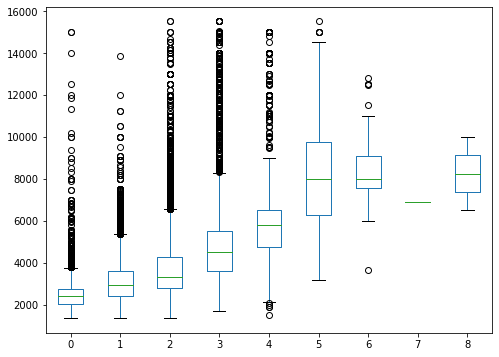

In [128]:
df2.plot.box(figsize = (8,6))

In [0]:
# Use scikit-learn for linear regression with one feature. 

In [0]:
# 1. Import the appropriate estimator class from Scikit-Learn
from sklearn.linear_model import LinearRegression

In [0]:
# 2. Instantiate this class
model = LinearRegression()

In [0]:
# 3. Arrange X features matrix & y target vector
features = ['bedrooms']
target = 'price'

X_train = df[features]
y_train = df[target]

In [150]:
# 4. Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
# 5. Apply the model to new data
bedrooms = 3
X_test = [[bedrooms]]
y_pred = model.predict(X_test)
y_pred

array([4827.73665176])

###Stretch Goal: 2 or more features.

In [0]:
# Use scikit-learn for linear regression with TWO features. 

In [0]:
# 1. Import the appropriate estimator class from Scikit-Learn
from sklearn.linear_model import LinearRegression

In [0]:
# 2. Instantiate this class
model = LinearRegression()

In [0]:
# 3. Arrange X features matrix & y target vector
features = ['bedrooms', 'bathrooms']
target = 'price'

X_train = df[features]
y_train = df[target]

In [138]:
# 4. Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
# 5. Apply the model to new data
bedrooms = 4
bathrooms = 3
X_test = [[bedrooms, bathrooms]]
y_pred = model.predict(X_test)
y_pred

array([8302.67177207])

In [0]:
 # Define a function to make new predictions and explain the model coefficient.

###model.coef_ 

Will print the change of incrementing the predictor model feature by 1.  So every change up or down by 1 will add or subtract the amount printed below (853.25).

In [152]:
model.coef_

array([853.25416753])

In [153]:
model.intercept_

2267.9741491780505

In [154]:
m = model.coef_[0]
b = model.intercept_
y_pred = [m*3 + b] # same as y_pred = model.predict([3]) --> array([4827.73665176])
y_pred

[4827.736651760343]

In [155]:
def predict(bedrooms):
    y_pred = model.predict([[bedrooms]])
    estimate = y_pred[0]
    coefficient = model.coef_[0]
    result = f'${estimate:,.0f} is the estimated cost for a {bedrooms:,.0f} bedroom apartment rental price in NYC.'
    explanation = f'In this linear regression, each additional bedroom adds ${coefficient:,.0f}.'
    return result + '\n' + explanation

print(predict(3))

$4,828 is the estimated cost for a 3 bedroom apartment rental price in NYC.
In this linear regression, each additional bedroom adds $853.


In [156]:
# 0 bedrooms (studio)
print(predict(0))

$2,268 is the estimated cost for a 0 bedroom apartment rental price in NYC.
In this linear regression, each additional bedroom adds $853.


In [157]:
# only 1 bedroom
print(predict(1))

$3,121 is the estimated cost for a 1 bedroom apartment rental price in NYC.
In this linear regression, each additional bedroom adds $853.


In [158]:
# 8 bedrooms
print(predict(8))

$9,094 is the estimated cost for a 8 bedroom apartment rental price in NYC.
In this linear regression, each additional bedroom adds $853.


In [159]:
from ipywidgets import interact

interact(predict, bedrooms=(0, 8))

interactive(children=(IntSlider(value=4, description='bedrooms', max=8), Output()), _dom_classes=('widget-inte…

<function __main__.predict>

###Geopy

In [24]:
pip install geopy

In [25]:
pip install folium

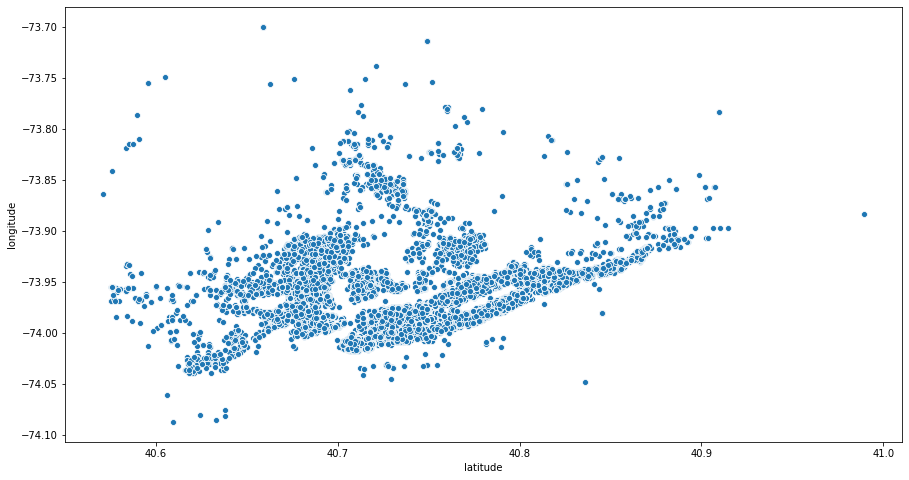

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,8))
sns.scatterplot(df['latitude'], df['longitude'])

In [0]:
import folium
m = folium.Map(location=[40.73, -73.93 ])

In [172]:
m